In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('crime_data.csv')

In [3]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
df2 = df.drop(['Unnamed: 0'],axis=1)
df2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [7]:
#Normalization using UDF
def norm(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [8]:
df2n = norm(df2)
df2n

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


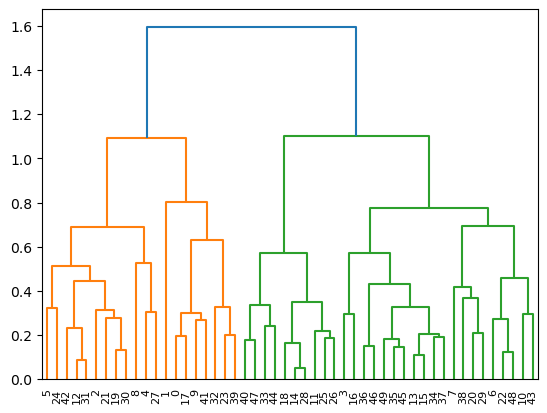

In [9]:
#Dendrogram
d =sch.dendrogram(sch.linkage(df2n,'complete'))

In [10]:
#creating clusters
c = AgglomerativeClustering(n_clusters = 2,affinity = 'euclidean',linkage='ward')
c

AgglomerativeClustering()

In [11]:
y = pd.DataFrame(c.fit_predict(df2n),columns=['cluster_id'])
y['cluster_id'].value_counts()

0    30
1    20
Name: cluster_id, dtype: int64

In [12]:
#adding to df
df2['cluater_id']=c.labels_
df2

,Murder,Assault,UrbanPop,Rape,cluater_id
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [13]:
df2.groupby('cluater_id').agg(['mean']).reset_index()

,cluater_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.870,114.433333,63.633333,15.943333
1,1,12.165,255.250000,68.400000,29.165000


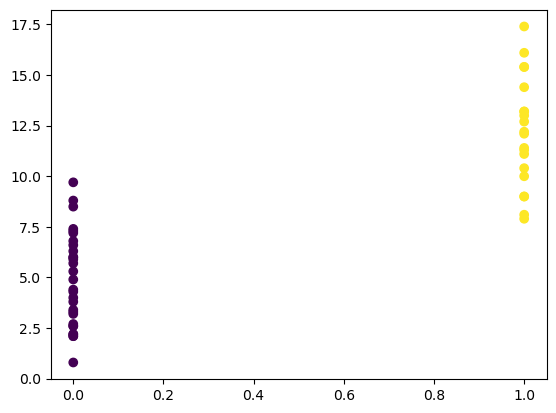

In [14]:
#plotting clusters
plt.scatter(df2['cluater_id'],df2['Murder'],c=c.labels_)

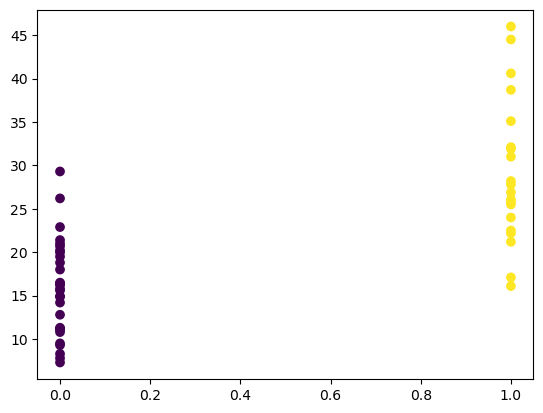

In [15]:
plt.scatter(df2['cluater_id'],df2['Rape'],c=c.labels_)

Normalizing data with in-built function

In [16]:
from sklearn.preprocessing import normalize
df3 =df.drop(['Unnamed: 0'],axis=1)
df3n=pd.DataFrame(normalize(df3),columns=df3.columns)
df3n

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


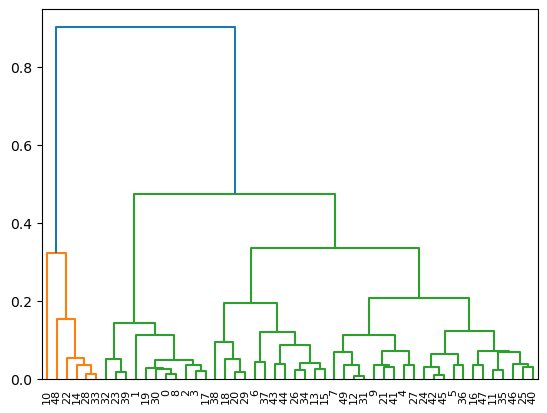

In [17]:
#Dendogram
d=sch.dendrogram(sch.linkage(df3n,'complete'))

In [18]:
#creating clusters 

In [19]:
c4=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
c4

AgglomerativeClustering(n_clusters=4)

In [20]:
y=pd.DataFrame(c4.fit_predict(df3n),columns=['cluster_id'])
y['cluster_id'].value_counts()

2    20
3    12
1    12
0     6
Name: cluster_id, dtype: int64

In [21]:
#adding to df3
df3['cluster_id']=c4.labels_
df3

,Murder,Assault,UrbanPop,Rape,cluster_id
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,2


In [22]:
df3.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,2.616667,54.833333,62.000000,12.333333
1,1,4.758333,116.583333,70.083333,15.683333
2,2,11.760000,255.550000,66.100000,27.090000
3,3,6.783333,141.583333,61.833333,21.466667


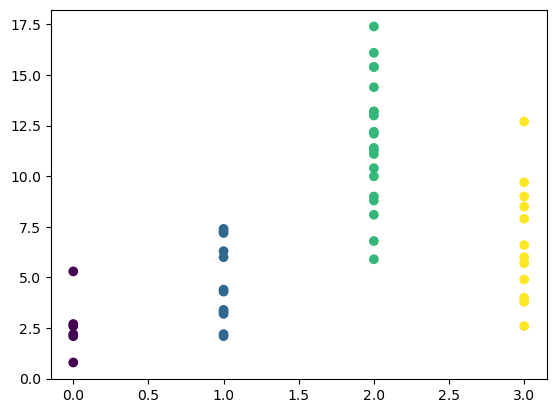

In [23]:
#plot clusters
plt.scatter(df3['cluster_id'],df3['Murder'], c=c4.labels_)

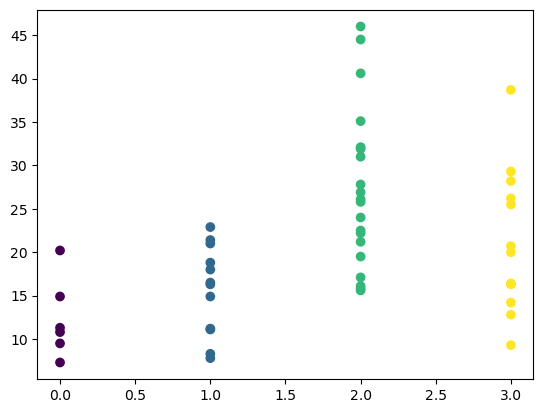

In [24]:
plt.scatter(df3['cluster_id'],df3['Rape'], c=c4.labels_)

# K means Clustering

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [27]:
df = pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [29]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [30]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [31]:
#normalization using standard scaler
dfn=StandardScaler().fit_transform(df)

In [32]:
wcss=[]
for i in range(1,4):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(dfn)
  wcss.append(kmeans.inertia_)

C:\Users\namu1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

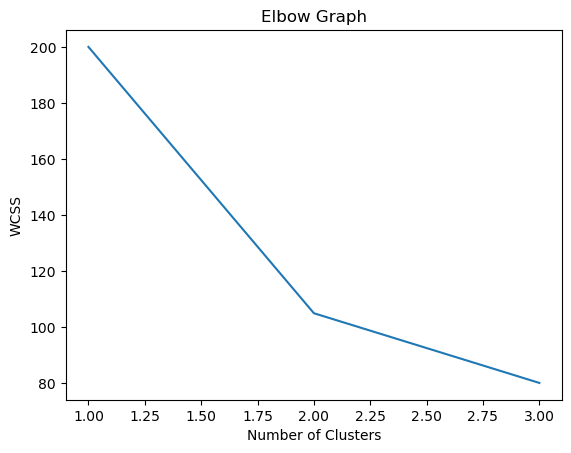

In [33]:
#plotting k values vs wcss for choosing K
plt.plot(range(1,4),wcss);
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

Cluster algorithm using K=2

In [34]:
c2=KMeans(2,random_state=30).fit(dfn)
c2

KMeans(n_clusters=2, random_state=30)

In [35]:
c2.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [36]:
#assigning clusters to data set
df2=df.copy()
df2['clusters2_id']=c2.labels_
df2

,Murder,Assault,UrbanPop,Rape,clusters2_id
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [37]:
#computing centroids for K=2 clusters
c2.cluster_centers_

array([[-0.67675778, -0.68274685, -0.13306084, -0.57037591],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386]])

In [38]:
df2.groupby('clusters2_id').agg(['mean']).reset_index()

,clusters2_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.870,114.433333,63.633333,15.943333
1,1,12.165,255.250000,68.400000,29.165000


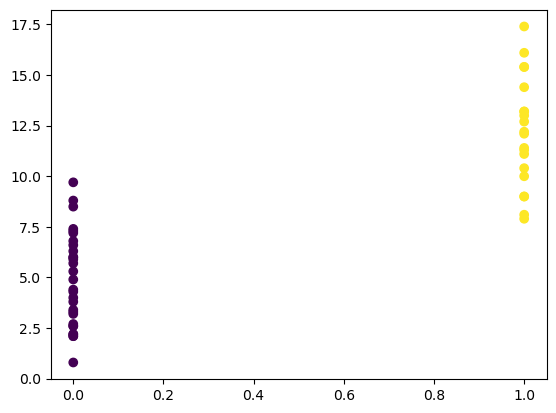

In [39]:
#plotting clusters
plt.scatter(df2['clusters2_id'],df2['Murder'],c=c2.labels_)

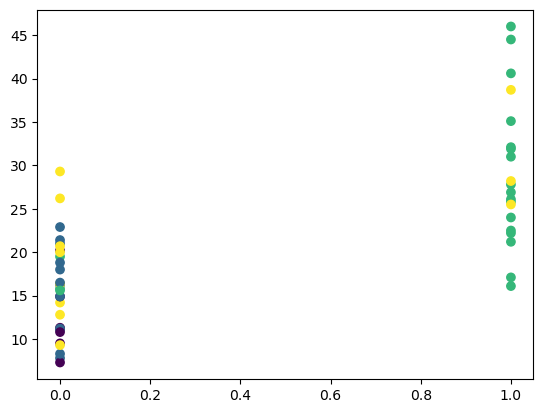

In [40]:
plt.scatter(df2['clusters2_id'],df2['Rape'],c=c4.labels_)

Clustering Algorithm using K=4

In [41]:
c4=KMeans(4,random_state=30).fit(dfn)
c4

KMeans(n_clusters=4, random_state=30)

In [42]:
c4.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [43]:
df3=df.copy()
df3['clusters4_id']=c4.labels_
df3

,Murder,Assault,UrbanPop,Rape,clusters4_id
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,0


In [44]:
#computing centroids
c4.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [45]:
#grouping
df3.groupby('clusters4_id').agg(['mean']).reset_index()

,clusters4_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.656250,138.875000,73.875000,18.781250
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.815385,257.384615,76.000000,33.192308


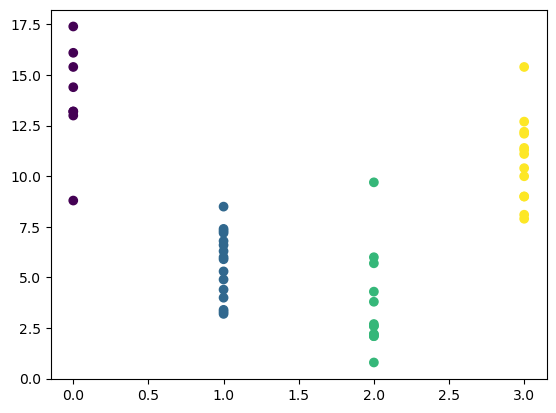

In [46]:
#plotting clusters
plt.scatter(df3['clusters4_id'],df3['Murder'],c=c4.labels_)

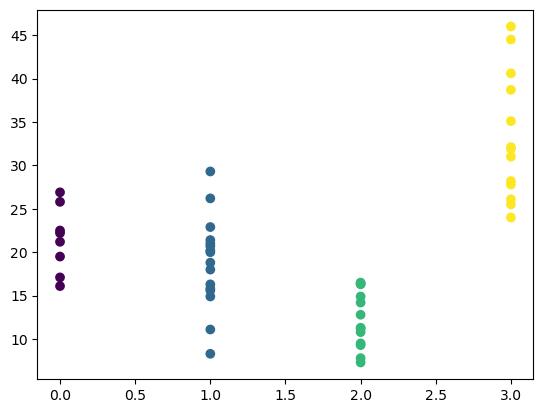

In [47]:
plt.scatter(df3['clusters4_id'],df3['Rape'],c=c4.labels_)

# DBSCAN

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [49]:
df=pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [51]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [52]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [53]:
#normalization using standard scaler
dfn=StandardScaler().fit_transform(df)
dfn

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Model 1

In [54]:
#DBScan Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(dfn)

DBSCAN(eps=1, min_samples=4)

In [55]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [56]:
#adding clusters to data set
df['clusters']=dbscan.labels_
df

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [57]:
df.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


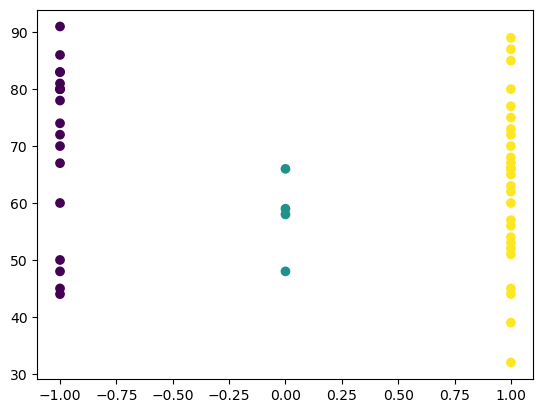

In [58]:
# Plotting Clusters
plt.scatter(df['clusters'],df['UrbanPop'], c=dbscan.labels_)

# Model 2

In [59]:
dbscan2=DBSCAN(eps=1,min_samples=2)
dbscan2.fit(dfn)

DBSCAN(eps=1, min_samples=2)

In [60]:
dbscan2.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [61]:
df['clusters2']=dbscan2.labels_
df

,Murder,Assault,UrbanPop,Rape,clusters,clusters2
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,-1,-1
2,8.1,294,80,31.0,-1,-1
3,8.8,190,50,19.5,-1,-1
4,9.0,276,91,40.6,-1,-1
5,7.9,204,78,38.7,-1,-1
6,3.3,110,77,11.1,1,1
7,5.9,238,72,15.8,-1,-1
8,15.4,335,80,31.9,-1,-1
9,17.4,211,60,25.8,-1,0


In [62]:
df.groupby('clusters2').agg(['mean']).reset_index()

,clusters2,Murder,Assault,UrbanPop,Rape,clusters
,,mean,mean,mean,mean,mean
0,-1,9.560,243.500000,70.800000,30.430000,-1.000000
1,0,14.950,237.000000,55.833333,22.616667,-0.333333
2,1,4.825,112.035714,63.357143,16.107143,1.000000
3,2,11.400,234.666667,83.000000,25.200000,-1.000000
4,3,11.600,280.000000,70.333333,31.666667,-1.000000


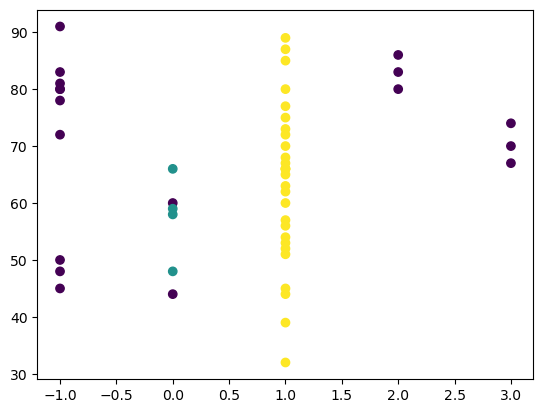

In [63]:
plt.scatter(df['clusters2'],df['UrbanPop'], c=dbscan.labels_)